# CHILD SEXUAL ABUSE AWARENESS PREDICTION:

### Child sexual abuse (CSA) is a serious problem that affects millions of children around the world. It is defined as any sexual activity involving a child under the age of 18, where the child is being used for the sexual gratification of an adult or older child. CSA can take many forms, including physical sexual contact, sexual exploitation, and sex trafficking.

### Impact of CSA

### CSA can have a devastating impact on children's lives. It can lead to physical and emotional problems, including post-traumatic stress disorder (PTSD), depression, anxiety, and substance abuse. Children who have been sexually abused are also at risk of developing social and behavioral problems, such as difficulty forming relationships and engaging in risky behaviors.

### In this project we will examine the data and create a machine learning model which can be used to predict in terms of probablity for Child sexual abuse awareness,We will get know how much a person is aware about Child Sexual Abuse


#### Importing necessary libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

#### Importing dataset

In [2]:
df=pd.read_csv("CSA.csv")
df

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate
...,...,...,...,...,...,...,...,...,...
2997,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Intermediate
2998,Agree,Agree,Disagree,Disagree,No,Yes,Yes,No,Beginner
2999,Agree,Agree,Agree,Agree,No,No,No,No,Beginner
3000,Disagree,Agree,Agree,Agree,Yes,Yes,Yes,Yes,Beginner


#### Here we can notice first 5 and last 5 rows of the dataset. The above dataset shows that there are 3002 rows and 9 columns present. The dataset contains both dependent and independent variables. In this dataset "Knowledge Level" is the target variable and the remaining feature columns that determine or help in predicting the Knowledge Level. Since the target variable is consists of 2 classes which is categorical in nature which makes this to be a "Classification Problem". Also the dataset contains only categorical data

In [3]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['"Children are safe among family members such as grandparents, uncles, aunts, cousins"',
       '"Children are mainly abused by strangers in our society"',
       'Male children dont need sexual abuse prevention knowledge',
       '"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"',
       'Do you know what child grooming is?',
       'Do you know what signs to look for to identify if your child has been abused?',
       'Do you think children need post abuse counseling for recovering?',
       'Do you think you should take legal action against the abuser of your child?',
       'Knowledge Level'],
      dtype='object')


#### These are the coulumns present in the dataset

In [4]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 9 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   "Children are safe among family members such as grandparents, uncles, aunts, cousins"                   3002 non-null   object
 1   "Children are mainly abused by strangers in our society"                                                3002 non-null   object
 2   Male children dont need sexual abuse prevention knowledge                                               3002 non-null   object
 3   "Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"  3002 non-null   object
 4   Do you know what child grooming is?                                                              

##### .This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.
##### .There are 9 columns with object datatype. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

In [5]:
# Checking for null values
df.isnull().sum()

"Children are safe among family members such as grandparents, uncles, aunts, cousins"                     0
"Children are mainly abused by strangers in our society"                                                  0
Male children dont need sexual abuse prevention knowledge                                                 0
"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"    0
Do you know what child grooming is?                                                                       0
Do you know what signs to look for to identify if your child has been abused?                             0
Do you think children need post abuse counseling for recovering?                                          0
Do you think you should take legal action against the abuser of your child?                               0
Knowledge Level                                                                                           0
dtype: int64

#### Using "isnull" method we can able to observe sum of missing values present in the dataset. It looks like there are no null values present. So no need to worry much.

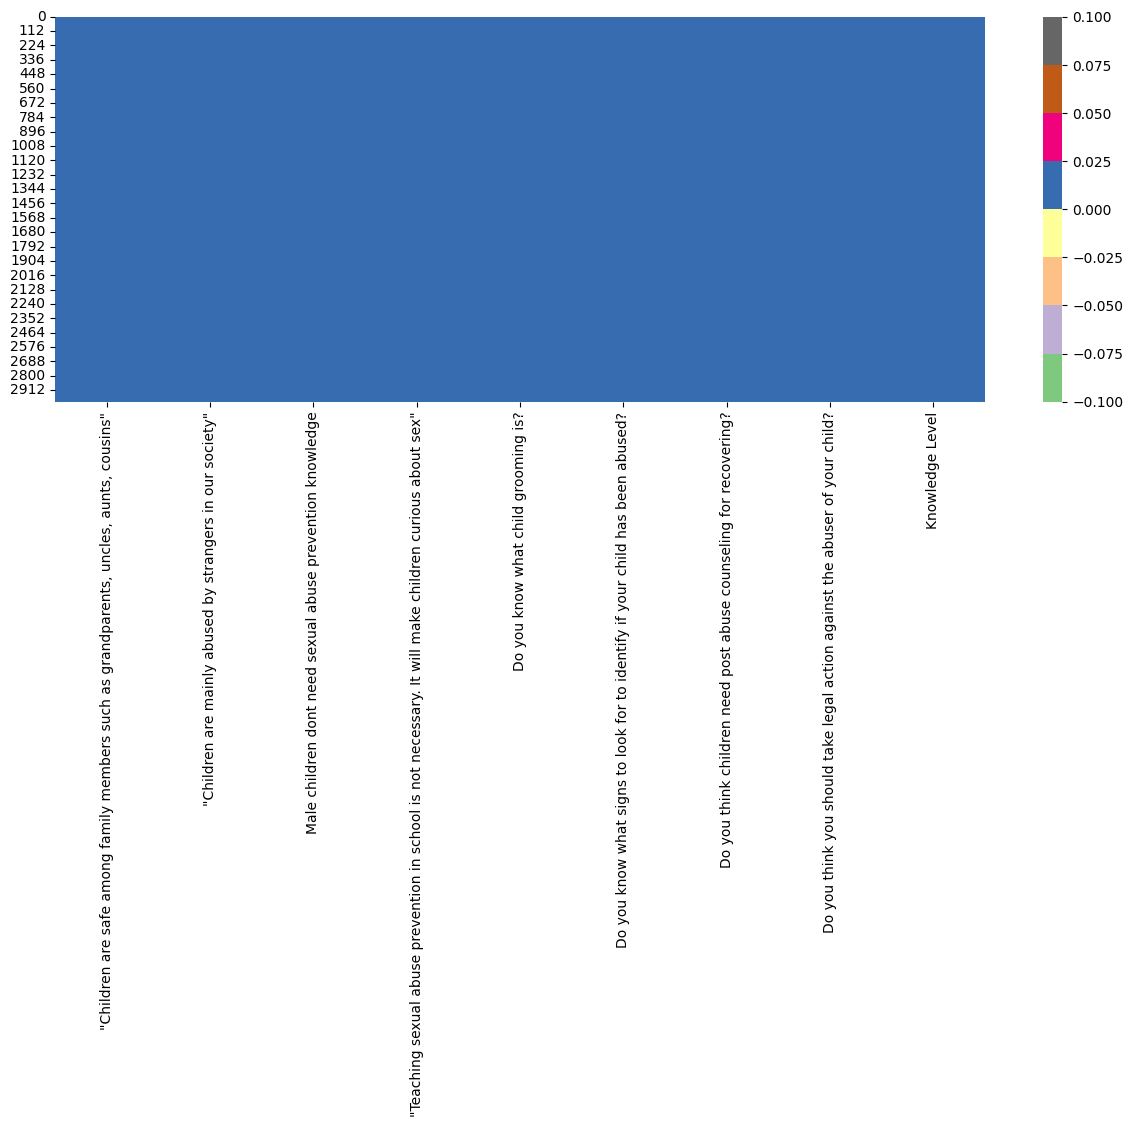

In [6]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="Accent")
plt.show()

#### It is clear from the heat map that there are no null values in any of the column.

In [7]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
"""Children are safe among family members such as grandparents, uncles, aunts, cousins""",2
"""Children are mainly abused by strangers in our society""",2
Male children dont need sexual abuse prevention knowledge,2
"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",2
Do you know what child grooming is?,2
Do you know what signs to look for to identify if your child has been abused?,2
Do you think children need post abuse counseling for recovering?,2
Do you think you should take legal action against the abuser of your child?,2
Knowledge Level,2


In [8]:
# Checking the uniqueness of target column
print("The unique value present in Knowledge Level is:",df['Knowledge Level'].unique())

The unique value present in Knowledge Level is: ['Beginner' 'Intermediate']


#### There are only two unique values present in the Knowledge Level

In [9]:
# Checking value count of the Knowledge Level
print("The value count of the Knowledge Level is:\n",df["Knowledge Level"].value_counts())

The value count of the Knowledge Level is:
 Knowledge Level
Beginner        1711
Intermediate    1291
Name: count, dtype: int64


#### This gives the list of values in the Knowledge Level. As we can see 'Beginner' indicates that a person is Beginner in Child Sexual Abuse Awareness which has 1711 values while 'Intermediate' indicates that a person is  Intermediate in Child  Sexual  Abuse Awareness which has 1291 values

## Data Visualization

### Univariate Analysis

<Axes: xlabel='Knowledge Level', ylabel='count'>

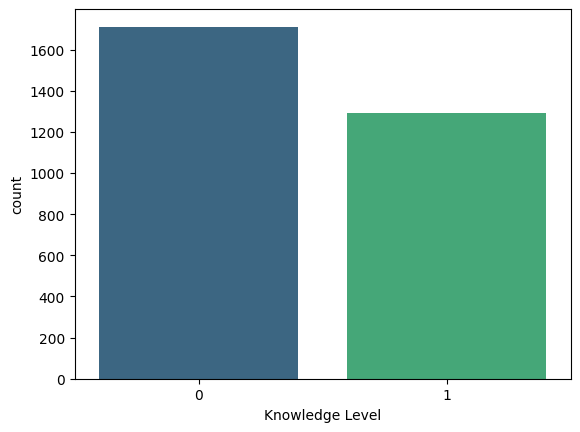

In [178]:
sns.countplot(x='Knowledge Level',data=df,palette='viridis')

### As we can see more than 1600 people are Beginner and more tha 1200 are Intermediate 

<Axes: xlabel='"Children are safe among family members such as grandparents, uncles, aunts, cousins"', ylabel='count'>

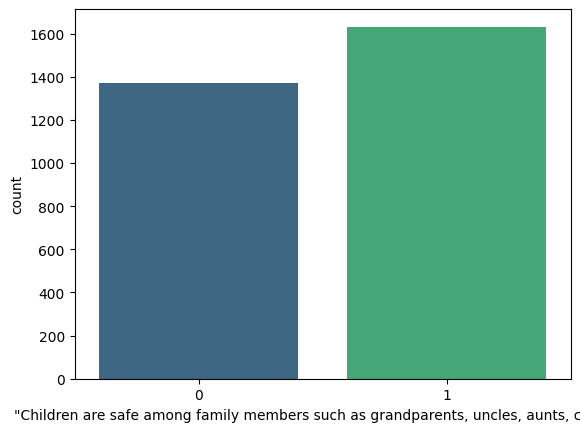

In [179]:
sns.countplot(x='"Children are safe among family members such as grandparents, uncles, aunts, cousins"',data=df,palette="viridis")

### As we can see here around 1600 people disagree and around 1400 agree that "Children are safe among family members such as grandparents, uncles, aunts, cousins"

<Axes: xlabel='"Children are mainly abused by strangers in our society"', ylabel='count'>

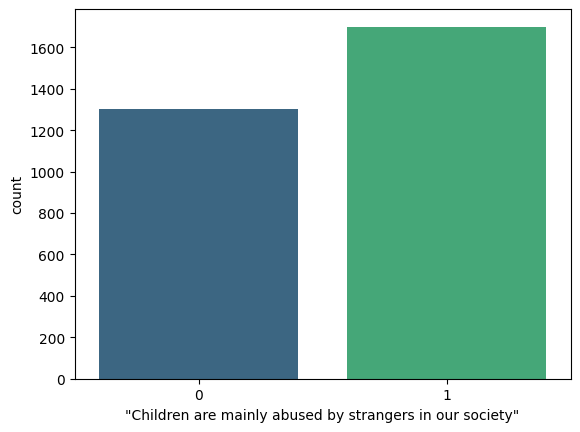

In [180]:
sns.countplot(x='"Children are mainly abused by strangers in our society"',data=df,palette='viridis')

### As we can see here more than 1600 people disagree and more than 1200 agree that "Children are mainly abused by strangers in our society"

<Axes: xlabel='Male children dont need sexual abuse prevention knowledge', ylabel='count'>

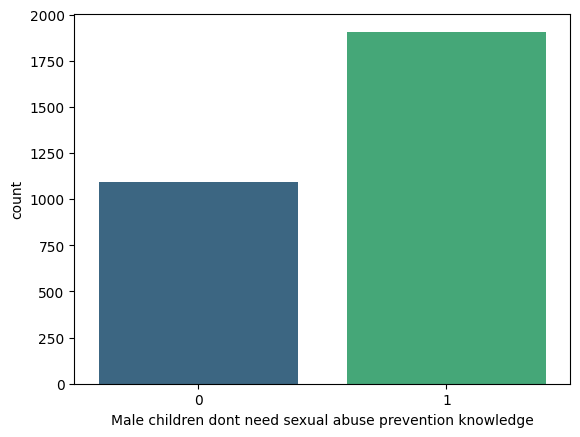

In [181]:
sns.countplot(x='Male children dont need sexual abuse prevention knowledge',data=df,palette="viridis")

### As we can see here more than 1750 disagree and over 1000 agree that Male children dont need sexual abuse prevention knowledge

<Axes: xlabel='"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"', ylabel='count'>

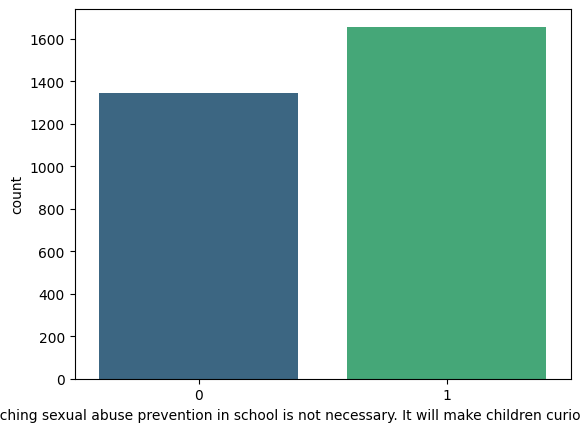

In [182]:
sns.countplot(x='"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"',data=df,palette="viridis")

### As we can see here around 1600 disagree and more than 1200 agree that "Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"

<Axes: xlabel='Do you know what child grooming is?', ylabel='count'>

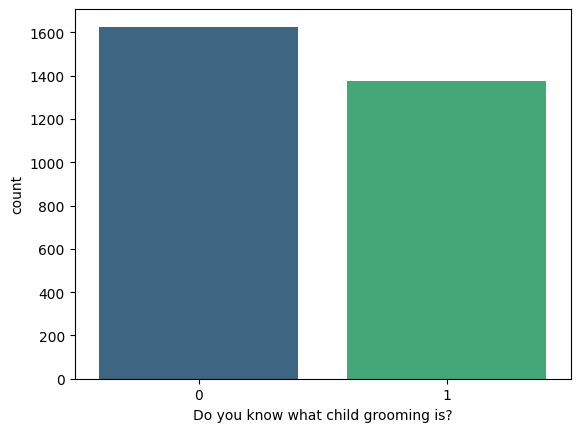

In [184]:
sns.countplot(x='Do you know what child grooming is?',data=df,palette="viridis")

### As we can see here around 1600 dont know about Child grooming

<Axes: xlabel='Do you know what signs to look for to identify if your child has been abused?', ylabel='count'>

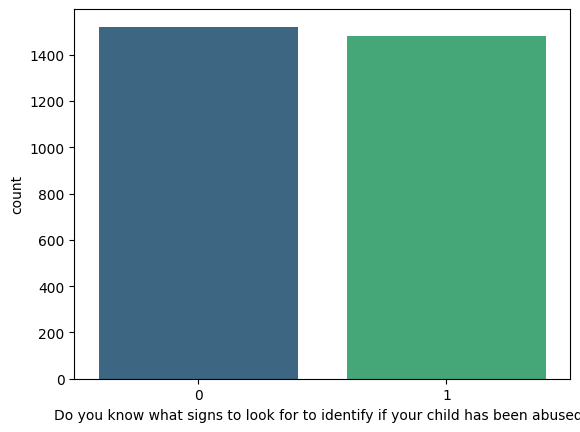

In [185]:
sns.countplot(x='Do you know what signs to look for to identify if your child has been abused?',data=df,palette="viridis")

### As we can see here that more than 1400 dont know about the signs to look for to identify if their child has been abused? and more than 1400 know about it

<Axes: xlabel='Do you think children need post abuse counseling for recovering?', ylabel='count'>

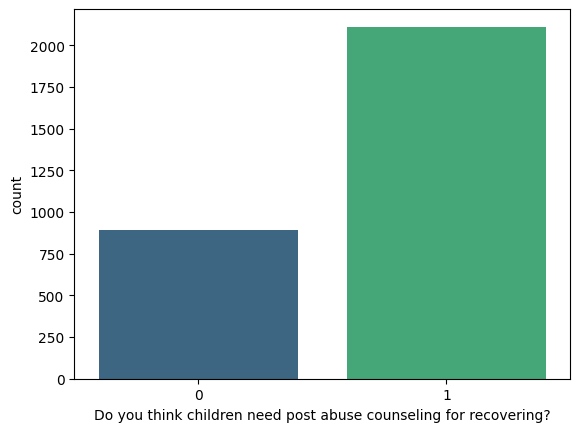

In [186]:
sns.countplot(x='Do you think children need post abuse counseling for recovering?',data=df,palette="viridis")

### More than 2000 people think that children need post abuse counseling for recovering?

<Axes: xlabel='Do you think you should take legal action against the abuser of your child?', ylabel='count'>

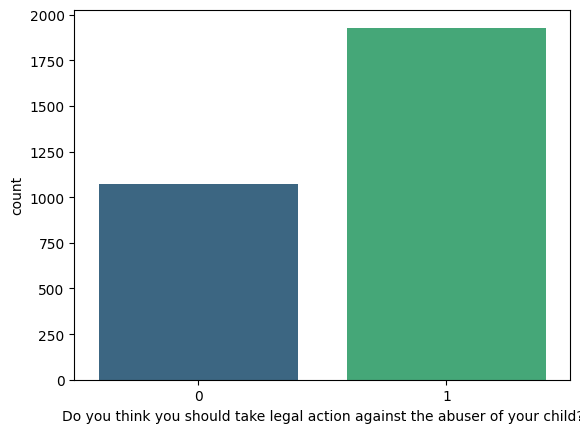

In [187]:
sns.countplot(x='Do you think you should take legal action against the abuser of your child?',data=df,palette="viridis")

### More than 1750 think that you should take legal action against the abuser of your child?

## Encoding the data

In [193]:

cat_col=[]

for i in df:
    if df[i].dtypes=="object":
        cat_col.append(i)

le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

## This is our data after Encoding

In [188]:
df

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,0,1,1,0
2,1,1,1,1,0,0,1,1,0
3,0,0,1,1,0,0,1,1,0
4,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2997,0,0,1,1,0,0,1,1,1
2998,0,0,1,1,0,1,1,0,0
2999,0,0,0,0,0,0,0,0,0
3000,1,0,0,0,1,1,1,1,0


### Checking for skewness

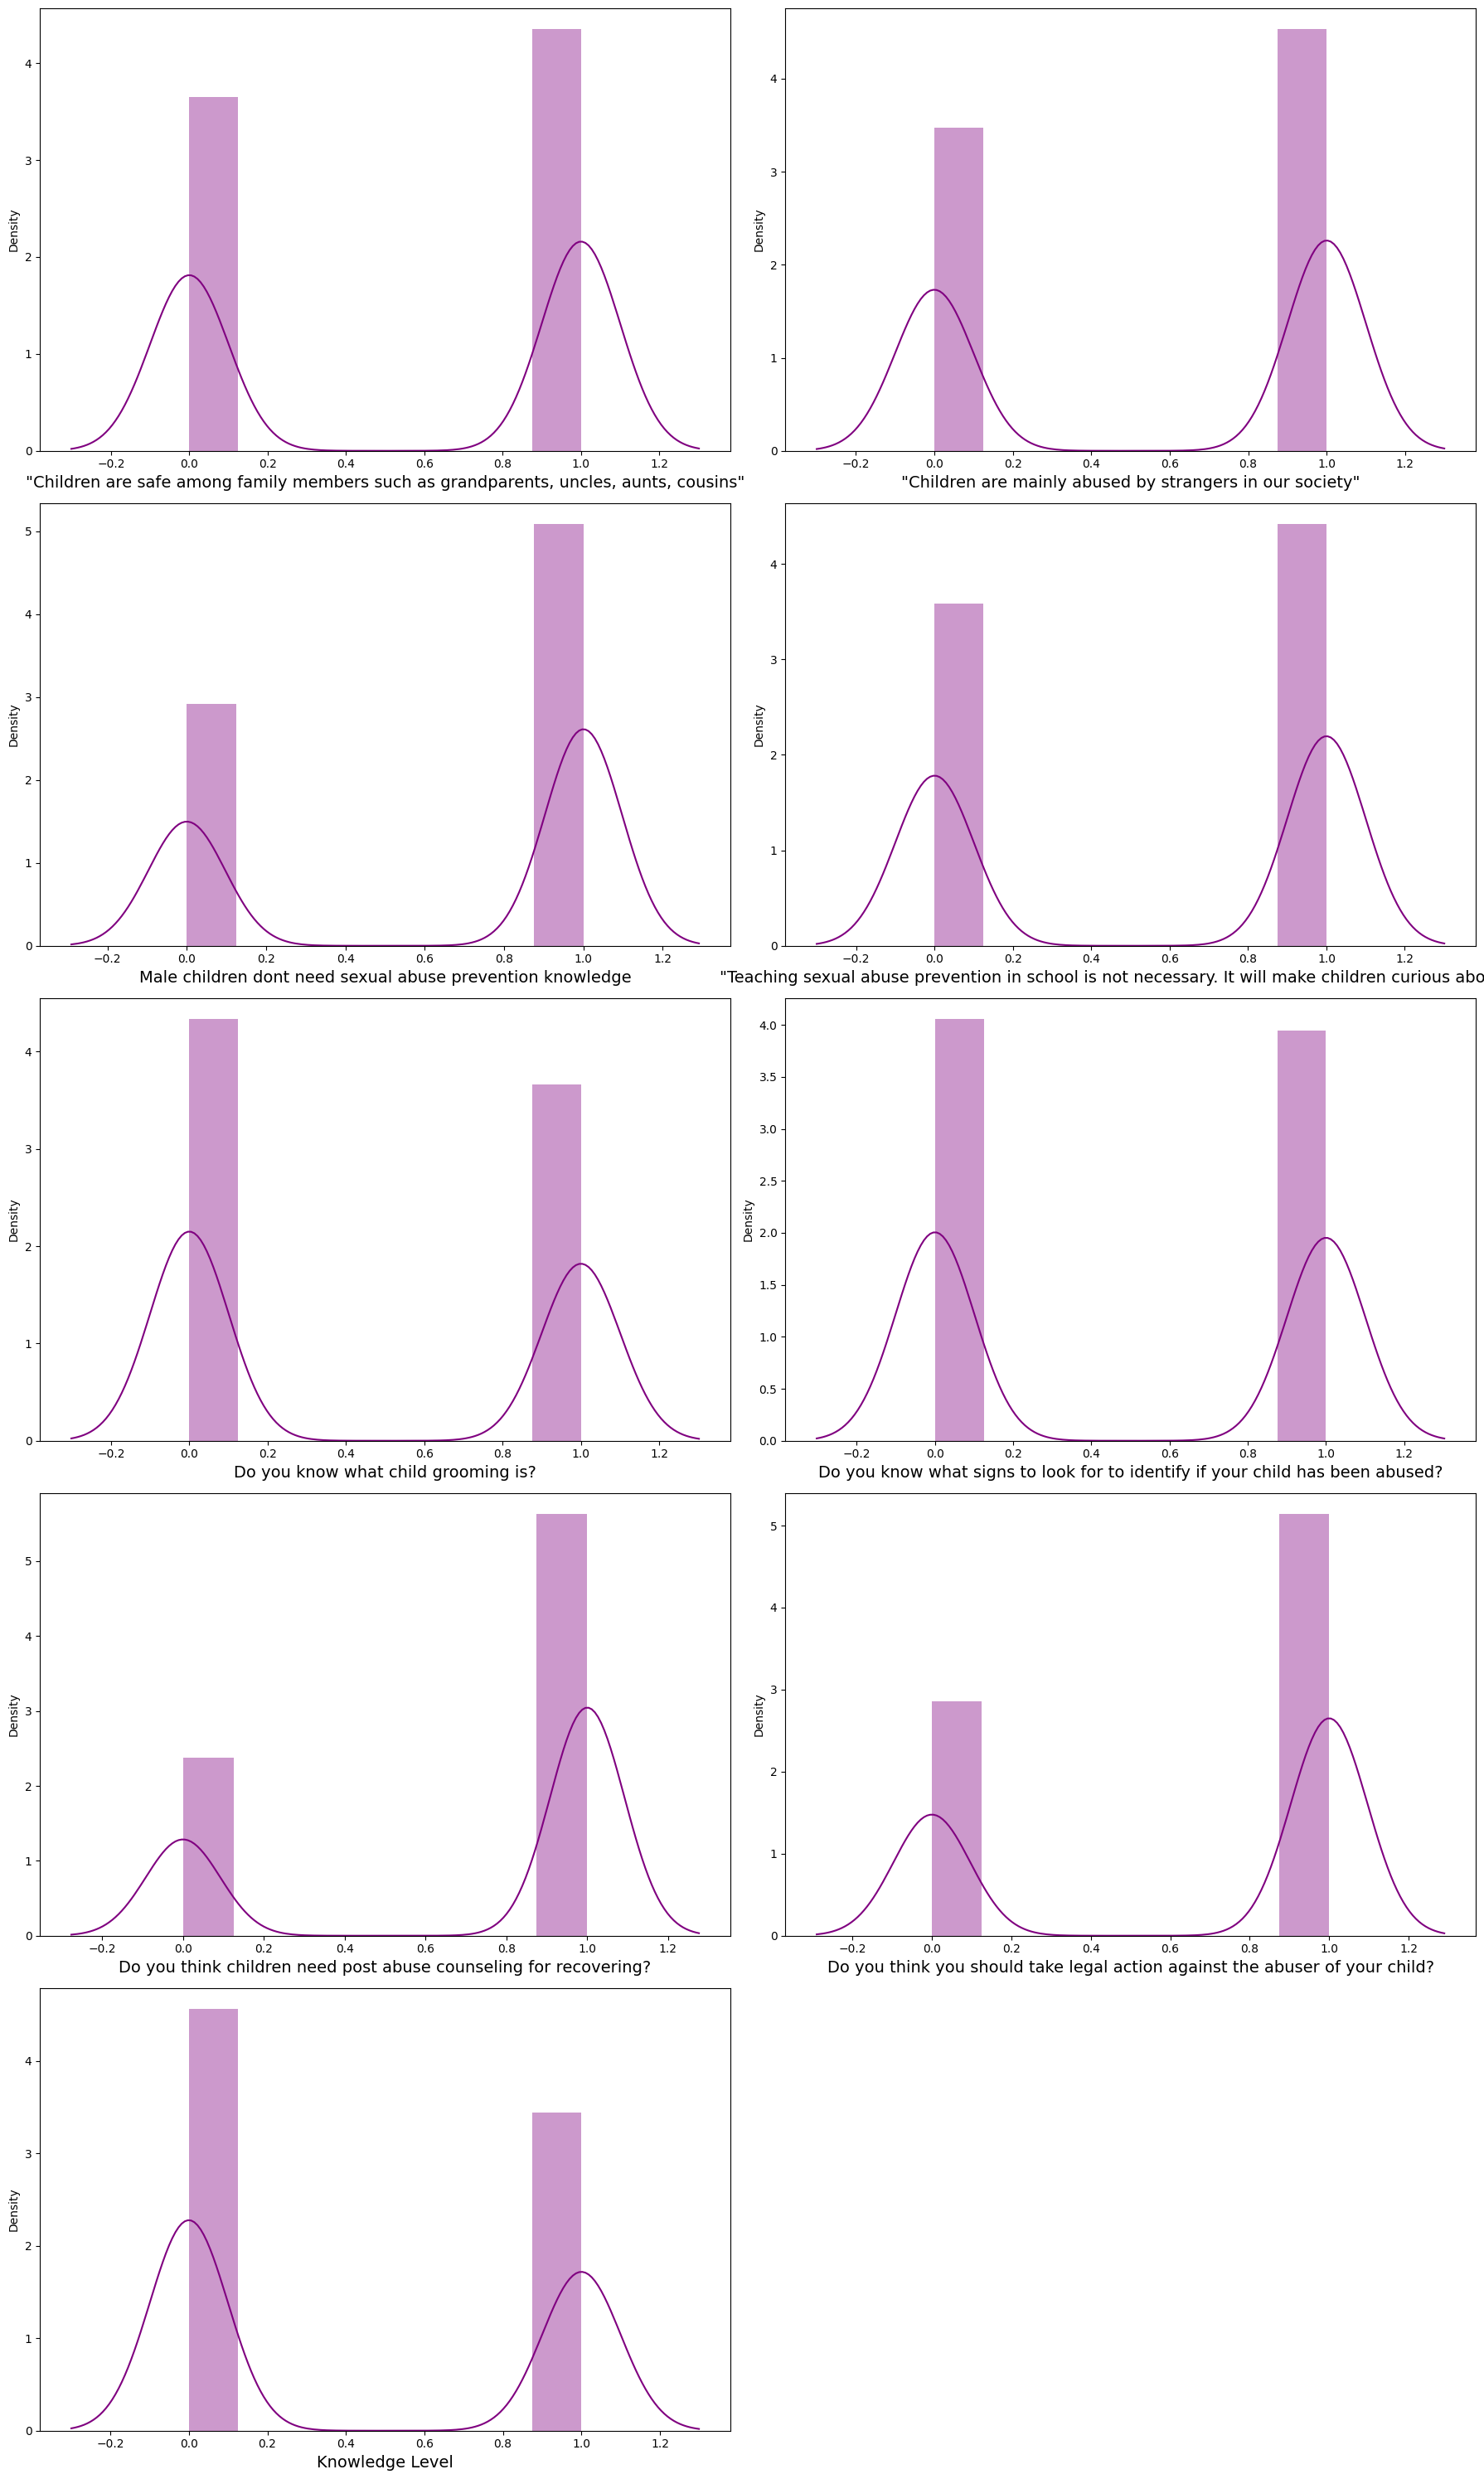

In [175]:
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[column],color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

### As we can see here our dataset is normally distributed

In [22]:
df.skew()

"Children are safe among family members such as grandparents, uncles, aunts, cousins"                    -0.175306
"Children are mainly abused by strangers in our society"                                                 -0.267652
Male children dont need sexual abuse prevention knowledge                                                -0.563694
"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"   -0.209098
Do you know what child grooming is?                                                                       0.167220
Do you know what signs to look for to identify if your child has been abused?                             0.026665
Do you think children need post abuse counseling for recovering?                                         -0.890008
Do you think you should take legal action against the abuser of your child?                              -0.593771
Knowledge Level                                                                 

### Seprating the feature and Target into x and y

In [23]:
x = df.iloc[:, 0:8]
y = df['Knowledge Level']

sc=StandardScaler()
x=sc.fit_transform(x)

In [24]:
# Dimension of x and y
x.shape, y.shape

((3002, 8), (3002,))

### Spliting Dataset into train and test

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.3)

### Finding best random state for building Classification Models

## Logistic Regression

In [168]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)
#(print(accuracy_score(ytest,ypred_lr)*100))
print (classification_report(ytest,ypred_lr))
train_lr=lr.score(xtrain,ytrain)*100
test_lr=lr.score(xtest,ytest)*100
print(f"Training score is:{train_lr}\n Testing Score is:{test_lr}")

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       530
           1       0.77      0.92      0.84       371

    accuracy                           0.85       901
   macro avg       0.85      0.86      0.85       901
weighted avg       0.87      0.85      0.86       901

Training score is:85.14992860542598
 Testing Score is:85.46059933407325


#### Logistic Regression gives us the Training accuracy of  85.14 and Testing accuracy of 85.46


# Decision Tree

In [192]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred_dtc=dtc.predict(xtest)
#print(accuracy_score(ytest,ypred_dtc)*100)
print (classification_report(ytest,ypred_dtc))
train_dtc=dtc.score(xtrain,ytrain)*100
test_dtc=dtc.score(xtest,ytest)*100
print(f"Training score is:{train_dtc}\n Testing Score is:{test_dtc}")

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       530
           1       0.91      0.93      0.92       371

    accuracy                           0.93       901
   macro avg       0.93      0.93      0.93       901
weighted avg       0.93      0.93      0.93       901

Training score is:93.09852451213708
 Testing Score is:93.22974472807991


In [189]:
dtc.get_depth()

8

### Decision Tree gives us the Training accuracy of 93.09 and Testing accuracy of 93.22

## Adaboost

In [170]:
adb=AdaBoostClassifier()
adb.fit(xtrain,ytrain)
ypred_adb=adb.predict(xtest)
#print(accuracy_score(ytest,ypred_adb)*100)
print (classification_report(ytest,ypred_adb))
train_adb=adb.score(xtrain,ytrain)*100
test_adb=adb.score(xtest,ytest)*100
print(f"Training score is:{train_adb}\n Testing Score is:{test_adb}")

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       530
           1       0.75      0.81      0.78       371

    accuracy                           0.81       901
   macro avg       0.81      0.81      0.81       901
weighted avg       0.82      0.81      0.81       901

Training score is:81.58019990480724
 Testing Score is:81.35405105438402


#### Adaboost gives us the Training acuuracy of 81.58 Testing accuracy of 81.35 

## Random Forest Classifier

In [171]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred_rfc=rfc.predict(xtest)
#print(accuracy_score(ytest,ypred_rfc)*100)
print (classification_report(ytest,ypred_rfc))
train_rfc=rfc.score(xtrain,ytrain)*100
test_rfc=rfc.score(xtest,ytest)*100
print(f"Training score is:{train_rfc}\n Testing Score is:{test_rfc}")

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       530
           1       0.91      0.94      0.92       371

    accuracy                           0.93       901
   macro avg       0.93      0.94      0.93       901
weighted avg       0.94      0.93      0.93       901

Training score is:93.09852451213708
 Testing Score is:93.45172031076582


#### Random Forest gives us the training accuracy of 93.09 and Testing accuracy of 93.45

## Gradient Boosting

In [172]:
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred_gbc=gbc.predict(xtest)
#print(accuracy_score(ytest,ypred_gbc)*100)
print (classification_report(ytest,ypred_gbc))
train_gbc=gbc.score(xtrain,ytrain)*100
test_gbc=gbc.score(xtest,ytest)*100
print(f"Training score is:{train_gbc}\n Testing Score is:{test_gbc}")

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       530
           1       0.90      0.94      0.92       371

    accuracy                           0.93       901
   macro avg       0.92      0.93      0.93       901
weighted avg       0.93      0.93      0.93       901

Training score is:91.76582579723942
 Testing Score is:92.89678135405104


#### Gradient boosting gives us the  Testing accuracy of 91.76 and Testing accuracy of 92.89

## XG Boosting

In [35]:
import xgboost as xgb

In [173]:
xgc=xgb.XGBClassifier()
xgc.fit(xtrain,ytrain)
ypred_xgc=xgc.predict(xtest)
#print(accuracy_score(ytest,ypred_xgc)*100)
print (classification_report(ytest,ypred_xgc))
train_xgc=xgc.score(xtrain,ytrain)*100
test_xgc=xgc.score(xtest,ytest)*100
print(f"Training score is:{train_xgc}\n Testing Score is:{test_xgc}")

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       530
           1       0.90      0.94      0.92       371

    accuracy                           0.93       901
   macro avg       0.93      0.93      0.93       901
weighted avg       0.93      0.93      0.93       901

Training score is:93.09852451213708
 Testing Score is:93.34073251942286


### XGB gives us the  Training accuracy of 93.09 and Testing accuracy of 93.34 

## Support Vector Machince (SVM)

In [37]:
from sklearn.svm import LinearSVC

In [174]:
svm=LinearSVC()
svm.fit(xtrain,ytrain)
ypred_svm=svm.predict(xtest)
#print(accuracy_score(ytest,ypred_svm)*100)
print (classification_report(ytest,ypred_svm))
train_svm=svm.score(xtrain,ytrain)*100
test_svm=svm.score(xtest,ytest)*100
print(f"Training score is:{train_svm}\n Testing Score is:{test_svm}")

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       530
           1       0.77      0.92      0.84       371

    accuracy                           0.85       901
   macro avg       0.85      0.86      0.85       901
weighted avg       0.87      0.85      0.86       901

Training score is:85.14992860542598
 Testing Score is:85.46059933407325


### SVM gives Training accuracy 85.14 and Testing 85.46

## Overall Accuracies:

In [153]:
print(f"Logistic Regression:\n Training score is:{train_lr}\n Testing Score is:{test_lr}")
print(f"Decision Tree:\n Training score is:{train_dtc}\n Testing Score is:{test_dtc}")
print(f"RFC:\n Training score is:{train_rfc}\n Testing Score is:{test_rfc}")
print(f"Adaboost:\n Training score is:{train_adb}\n Testing Score is:{test_adb}")
print(f"Gradient boosting:\n Training score is:{train_gbc}\n Testing Score is:{test_gbc}")
print(f"XGB:\n Training score is:{train_xgc}\n Testing Score is:{test_xgc}")
print(f"SVM:\n Training score is:{train_svm}\n Testing Score is:{test_svm}")

Logistic Regression:
 Training score is:85.14992860542598
 Testing Score is:85.46059933407325
Decision Tree:
 Training score is:93.09852451213708
 Testing Score is:93.22974472807991
RFC:
 Training score is:93.09852451213708
 Testing Score is:93.45172031076582
Adaboost:
 Training score is:81.58019990480724
 Testing Score is:81.35405105438402
Gradient boosting:
 Training score is:91.76582579723942
 Testing Score is:92.89678135405104
XGB:
 Training score is:93.09852451213708
 Testing Score is:93.34073251942286
SVM:
 Training score is:85.14992860542598
 Testing Score is:85.46059933407325


# As we can see here RFC is the best fitted model as it has given the best accuracy is both Testing and Training

## User define

In [199]:
    #"Agree":1,
    #"Disagree":0,
    #"No": 0,
    #"Yes":1\
def prediction():
    Q1=(input("Children are safe among family members such as grandparents, uncles, aunts, cousins(Agree/Disagree)"))
    Q2=(input("Children are mainly abused by strangers in our society(Agree/Disagree)"))
    Q3=(input("Male children dont need sexual abuse prevention knowledge(Agree/Disagree)"))
    Q4=(input("Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex(Agree/Disagree)"))
    Q5=(input("Do you know what child grooming is?(Yes/No)"))
    Q6=(input("Do you know what signs to look for to identify if your child has been abused?(Yes/No)"))
    Q7=(input("Do you think children need post abuse counseling for recovering?(Yes/No)"))
    Q8=(input("Do you think you should take legal action against the abuser of your child?(Yes/No)"))
    Final_answer=rfc.predict([[Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8]])[:]
    #print(f"Your knowledge level is:-{Final_answer}")
    if (Final_answer==1):
        print("Your knowledge level is:-Intermediate")
    else:
        print("Your knowledge level is:-Beginner")




IndentationError: expected an indented block after function definition on line 5 (411528805.py, line 6)

In [200]:
prediction()

Your knowledge level is:-Beginner
